# Finding Heavy Traffic Indicators on I-94

## Introduction

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Data Set Information:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

### Attribute Information:

* holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair 
* temp Numeric Average temp in kelvin 
* rain_1h: Numeric Amount in mm of rain that occurred in the hour 
* snow_1h: Numeric Amount in mm of snow that occurred in the hour 
* clouds_all: Numeric Percentage of cloud cover 
* weather_main: Categorical Short textual description of the current weather 
* weather_description: Categorical Longer textual description of the current weather 
* date_time: DateTime Hour of the data collected in local CST time 
* traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The dataset [documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [150]:
import pandas as pd

dataset = pd.read_csv("datasets/Metro_Interstate_Traffic_Volume.csv")
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [152]:
# Import matplotlib and allow drawing graphs in Jupyter

import matplotlib.pyplot as plt
%matplotlib inline

## Rush hour

According to the graph we see two spikes that are 2x as much compared to the average traffic volume. 1 spike in the first distribution of around 0 - 800 and another one at 4500 - 5000. This could be caused due to rush hour and quiet night times.

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

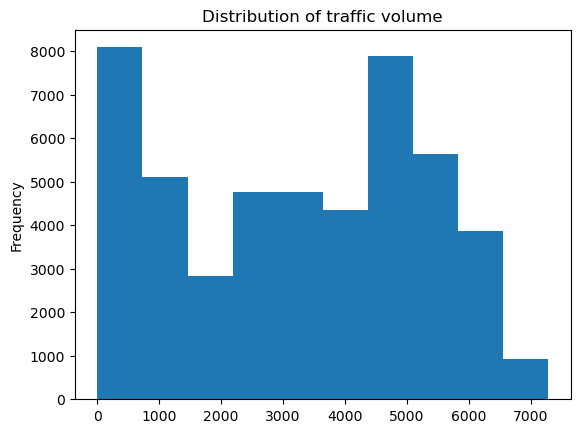

In [153]:
dataset["traffic_volume"].plot.hist()
plt.title("Distribution of traffic volume")
plt.show()

In [154]:
dataset["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [155]:
dataset["date_time"] = pd.to_datetime(dataset["date_time"])
dataset["date_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: date_time
Non-Null Count  Dtype         
--------------  -----         
48204 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.7 KB


## Day v.s. night

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [156]:
dataset_daytime = dataset.loc[dataset["date_time"].dt.hour.between(7, 19, "left")].copy()
dataset_daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [157]:
dataset_nighttime = dataset.loc[dataset["date_time"].dt.hour.between(0, 7, "left") | 
                            dataset["date_time"].dt.hour.between(19, 23)].copy()
dataset_nighttime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


We've created two datasets

1. dataset_daytime containing all values the date_time hours from 7 a.m. to 7 p.m. (12 hours)
2. dataset_nighttime containing all values from the remaining hours. 7 p.m. to 7 a.m. (12 hours)

In [158]:
dataset_daytime["date_time"].dt.hour.value_counts().sort_index()

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64

In [159]:
dataset_nighttime["date_time"].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

We see that the Daytime graph is left or negatively skewed and the Nighttime graph is right skewed. Given that the x-axis is the Traffic Volume we can conclude that the bulk of heavy traffic volume happen during Daytime.

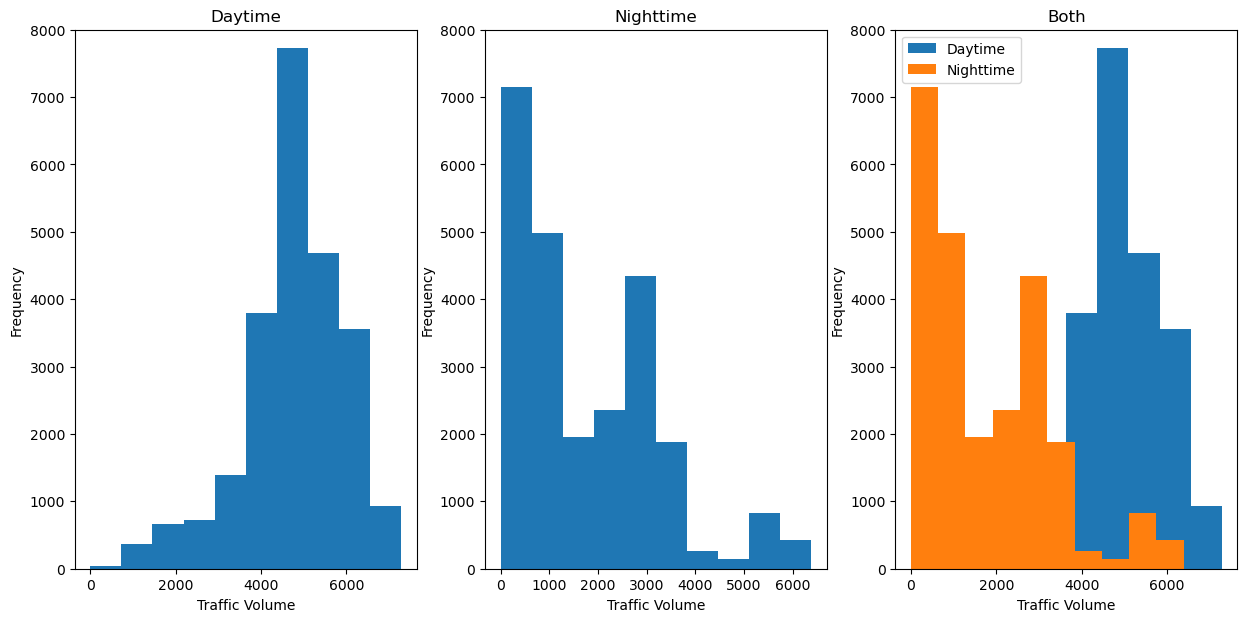

In [160]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(15, 7)

ax1.set_title("Daytime")
ax1.hist(dataset_daytime["traffic_volume"])
ax1.set_xlabel("Traffic Volume")
ax1.set_ylabel("Frequency")
ax1.set_ylim(0, 8000)

ax2.set_title("Nighttime")
ax2.hist(dataset_nighttime["traffic_volume"])
ax2.set_xlabel("Traffic Volume")
ax2.set_ylabel("Frequency")
ax2.set_ylim(0, 8000)

ax3.set_title("Both")
ax3.hist(dataset_daytime["traffic_volume"], label="Daytime")
ax3.hist(dataset_nighttime["traffic_volume"], label="Nighttime")
ax3.set_xlabel("Traffic Volume")
ax3.set_ylabel("Frequency")
ax3.set_ylim(0, 8000)

plt.legend()
plt.show()

The mean confirms our previous statement since the mean for the Daytime dataset (4762) is +2x more than Nighttime (1785). 

Since we're interested in indicators for heavy traffic we can discard the Nighttime dataset and continue our analysis with the daytime dataset.

In [161]:
dataset_daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [162]:
dataset_nighttime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## Seasonality

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

### Months timeframe

In [163]:
dataset_daytime["month"] = dataset_daytime.loc[:, "date_time"].dt.month
by_month = dataset_daytime.groupby("month").mean()
by_month.head(12)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


Looking at the graph below we can see the month January, July and December barely show any traffic on the road. This could be caused by seasonality and the holiday periods.

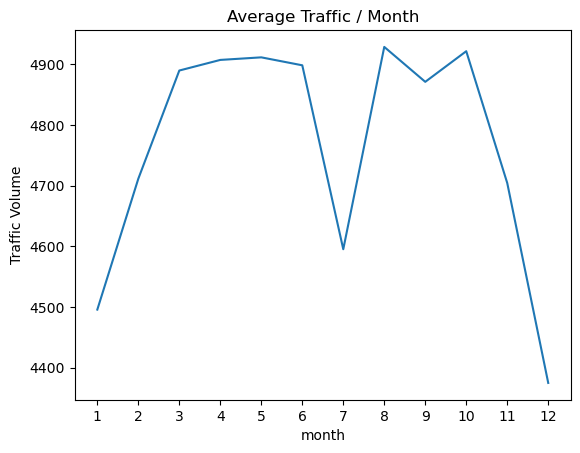

In [164]:
import numpy as np

by_month["traffic_volume"].plot.line()
plt.title("Average Traffic / Month")
plt.ylabel("Traffic Volume")
plt.xticks(np.arange(1, 13, 1))

plt.show()

### Days

In [165]:
dataset_daytime["day_of_week"] = dataset_daytime.copy().loc[:, 'date_time'].dt.dayofweek
by_day_of_week = dataset_daytime.groupby("day_of_week").mean()
by_day_of_week["traffic_volume"]  # 0 is Monday, 6 is Sunday

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

From the graph below we can conclude that most of the traffic occurs during Monday - Friday which checks out due that being workdays.

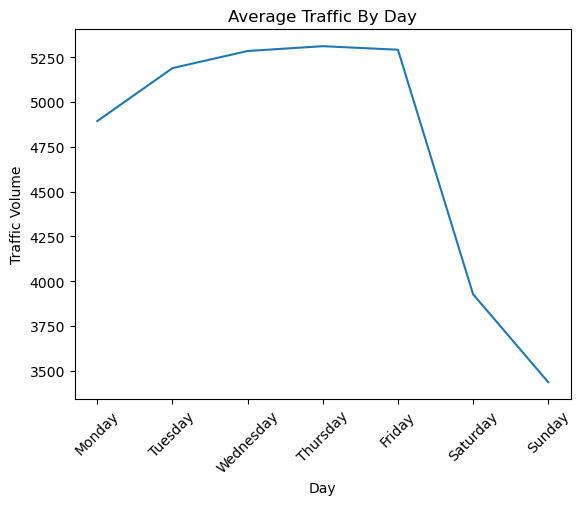

In [166]:
by_day_of_week["traffic_volume"].plot.line()
plt.title("Average Traffic By Day")
plt.xlabel("Day")
plt.ylabel("Traffic Volume")
plt.xticks(ticks=np.arange(0, 7, 1),
           labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
           rotation=45)

plt.show()

### Hours

We're going to further deepdive into the data by looking at the time of the day. Since the weekends will drag down the average values we'll look at those averages separatly.

In [167]:
dataset_daytime["hour"] = dataset_daytime.loc[:, "date_time"].dt.hour
work_days = dataset_daytime[dataset_daytime.copy()["day_of_week"] <= 4] #4 equals Friday
weekend = dataset_daytime[dataset_daytime.copy()["day_of_week"] >= 5]

by_hour_work = work_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

In [168]:
by_hour_work["traffic_volume"]

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [169]:
by_hour_weekend["traffic_volume"]

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

            temp   rain_1h   snow_1h  clouds_all  traffic_volume     month  \
hour                                                                         
7     278.662639  0.145105  0.000068   50.538983     6030.413559  6.363390   
8     278.938443  0.144614  0.000135   53.666441     5503.497970  6.567659   
9     279.628421  0.156829  0.000139   53.619709     4895.269257  6.484386   
10    280.664650  0.113984  0.000033   54.781417     4378.419118  6.481283   
11    281.850231  0.151976  0.000000   52.808876     4633.419470  6.448819   

      day_of_week  
hour               
7        1.984407  
8        1.989175  
9        1.981263  
10       1.957888  
11       1.979957  


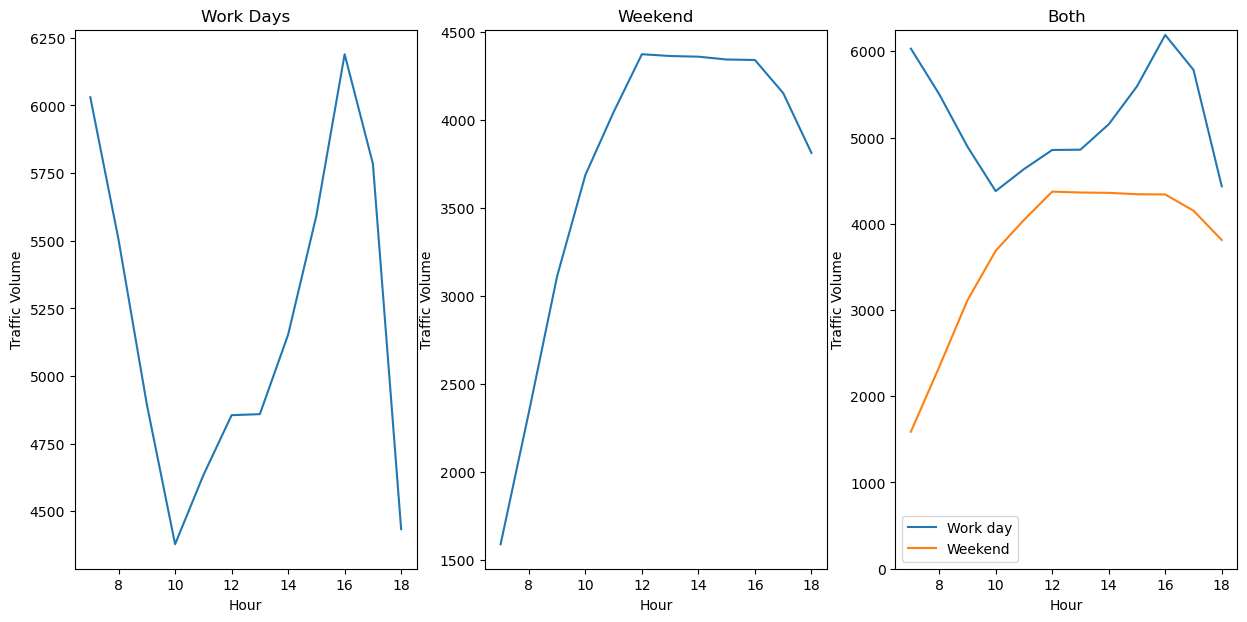

In [170]:
print(by_hour_work.head())
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(15, 7)

ax1.set_title("Work Days")
ax1.plot(by_hour_work.index, by_hour_work["traffic_volume"])
ax1.set_xlabel("Hour")
ax1.set_ylabel("Traffic Volume")


ax2.set_title("Weekend")
ax2.plot(by_hour_weekend.index, by_hour_weekend["traffic_volume"])
ax2.set_xlabel("Hour")
ax2.set_ylabel("Traffic Volume")

ax3.set_title("Both")
ax3.plot(by_hour_work.index, by_hour_work["traffic_volume"], label="Work day")
ax3.plot(by_hour_weekend.index, by_hour_weekend["traffic_volume"], label="Weekend")
ax3.set_xlabel("Hour")
ax3.set_ylabel("Traffic Volume")
ax3.set_ylim(0, 6250)

plt.legend()
plt.show()

As expected we see much less traffic over the weekend. During the week however, traffic peaks between 7 - 8 in the morning and 15:30 - 17:00 in the afternoon.

## Weather correlation

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [171]:
dataset.corr()[["traffic_volume"]]

,traffic_volume
temp,0.130299
rain_1h,0.004714
snow_1h,0.000733
clouds_all,0.067054
traffic_volume,1.000000


The temperatures correlation coefficient with traffic volume is 0.130299 calculated with Pearsons R (PCC)

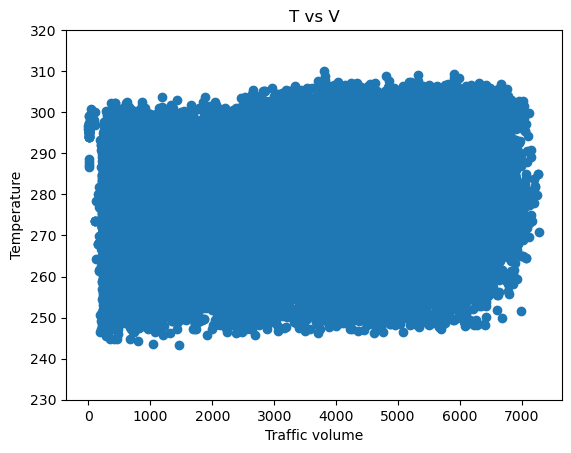

In [172]:
plt.scatter(dataset["traffic_volume"], dataset["temp"])
plt.xlabel("Traffic volume")
plt.ylabel("Temperature")
plt.title("T vs V")
plt.ylim(230, 320)
plt.show()

Sadly, we can't conclude anything usefull from this scatter plot, nor from any other correlated temperature values since the remaining values have a lower correclation coefficient compared to Temperature.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns.

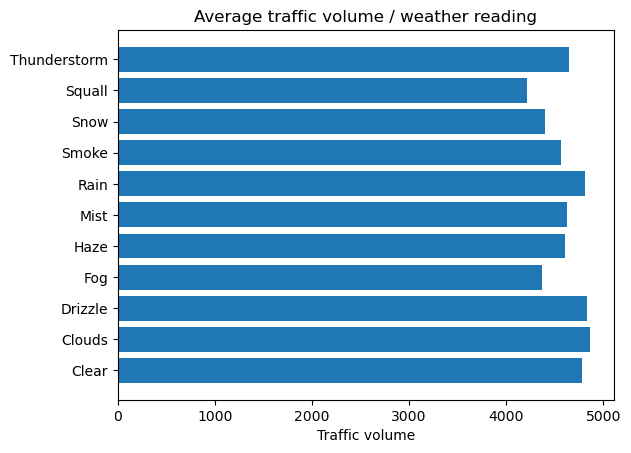

In [173]:
dataset_daytime["weather_description"].value_counts()

by_weather_daytime = dataset_daytime.groupby(dataset["weather_main"]).mean()
by_weather_description_daytime = dataset_daytime.groupby(dataset["weather_description"]).mean()

plt.barh(by_weather_daytime.index, by_weather_daytime["traffic_volume"])
plt.title("Average traffic volume / weather reading")
plt.xlabel("Traffic volume")
plt.show()

So far, we can't find any indicator for heavy traffic in the categorical short description for weather. Let's look more into detail when plotting the description.

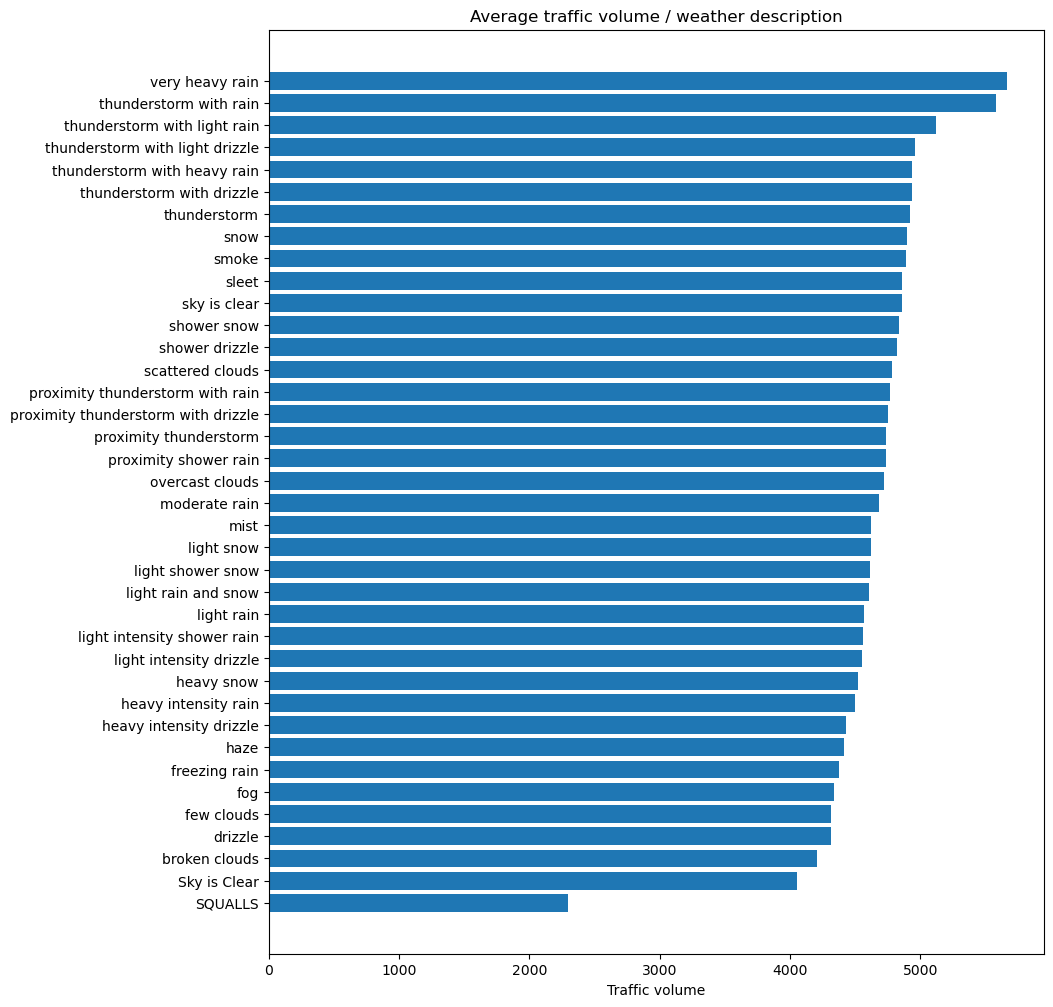

In [174]:
plt.figure(figsize=(10, 12))
plt.barh(by_weather_description_daytime.index, by_weather_description_daytime["traffic_volume"].sort_values())
plt.title("Average traffic volume / weather description")
plt.xlabel("Traffic volume")
plt.show()

This graph shows that the top 3 weather indicators that result in heavy traffic are:

1. Very heavy rain
2. Thunderstorm with rain
3. Thunderstorm with light rain

## Conclusion

### Time indicators
During this analyses we've concluded that high traffic occurs during rush hours. The station recorded more than 5000 units passing in the early morning around 8 and late afternoon around 16. Also, noticed a drop in average traffic volume during the weekends so we exluded that data from the analysis to not drag down the numbers.

We can also conclude that traffic is more during warmer months (March - October) with the exception of July. Most likely this is caused by holiday seasons and bad weather.

### Weather indicators
Lastly the weather also plays a role in traffic volumes. Initially we didn't find a high correlation coefficient with any of the given columns of the dataset. However if we plot the average traffic volume for each categorical long description of the weather we see that heavy rain and thunderstorms cause a spike in traffic volume.